In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

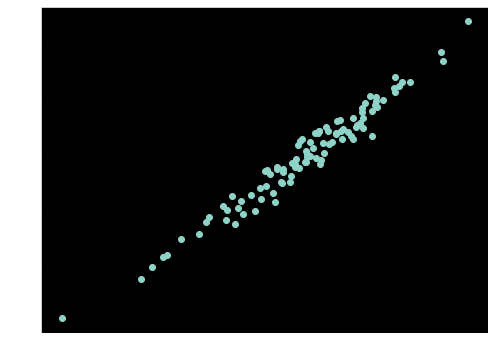

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
lr=0.01
n_iters=1000

In [5]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [6]:
weights=np.zeros(n_features)
weights

array([0.])

In [7]:
bias=0
X_train_t=X_train.T
var1=1/n_samples

In [8]:
for _ in range(n_iters):  
    a=[]     
    for i in X_train:    # np.dot(X, self.weights)
        t=np.dot(i,weights)
        a.append(t)

    a=np.array(a)

    y_pred=a+bias  # y_pred=np.dot(X, self.weights) + bias 

    r=y_pred-y_train

    p=[]
    for i in X_train_t:
        t=np.dot(i,r)
        p.append(t)
    
    p=np.array(p)
    dw=var1*p
    d=0
    for m in r:
        d+=m

    db=var1*d

    dw=dw*lr
    weights=weights-dw

    db=db*lr
    bias=bias-db

In [9]:
bias

0.9205897852264802

In [10]:
weights

array([87.40396437])

#### testing:

predictions=X_test*weights+bias

In [11]:
X_test

array([[ 0.2477922 ],
       [-0.6365235 ],
       [ 0.46439233],
       [ 0.99194602],
       [-2.24268495],
       [ 0.55343891],
       [-0.89715678],
       [ 0.12471295],
       [ 0.28909194],
       [ 0.07619959],
       [-0.92625431],
       [ 0.70472062],
       [ 0.88716294],
       [ 0.70422823],
       [-0.34476601],
       [ 0.47143516],
       [ 1.03380073],
       [-1.40197328],
       [ 1.32110562],
       [ 0.84100879]])

In [12]:
type(X_test)

numpy.ndarray

In [13]:
predictions=(X_test*weights)+bias
predictions

array([[  22.57861038],
       [ -54.71408792],
       [  41.51032002],
       [  87.62060458],
       [-195.09896604],
       [  49.29334464],
       [ -77.49446984],
       [  11.82099635],
       [  26.18837149],
       [   7.58073585],
       [ -80.03770923],
       [  62.51596612],
       [  78.46214781],
       [  62.47292851],
       [ -29.21332664],
       [  42.12589204],
       [  91.27887218],
       [-121.61743296],
       [ 116.39045793],
       [  74.42809253]])

In [14]:
y_test

array([  -6.40043974,  -75.83288846,   43.02438483,   81.72162478,
       -197.98015036,   32.09705138, -102.66748012,   15.35071413,
          6.89232312,   26.28851288,  -80.36899984,   30.84591703,
         95.0686297 ,   69.43879729,  -45.80868283,   63.1880408 ,
         91.41603362, -108.37740214,  142.7546496 ,   87.77205622])

In [16]:
for a,b in zip(y_test,predictions):
    print(a,b)

-6.400439740897028 [22.57861038]
-75.83288846408419 [-54.71408792]
43.02438482670904 [41.51032002]
81.72162477765585 [87.62060458]
-197.9801503584435 [-195.09896604]
32.09705138165424 [49.29334464]
-102.66748011552487 [-77.49446984]
15.35071412820563 [11.82099635]
6.892323119468568 [26.18837149]
26.28851287900197 [7.58073585]
-80.36899984455164 [-80.03770923]
30.84591703151775 [62.51596612]
95.06862969774186 [78.46214781]
69.43879729019481 [62.47292851]
-45.80868282540775 [-29.21332664]
63.18804079600157 [42.12589204]
91.41603362148403 [91.27887218]
-108.37740214379002 [-121.61743296]
142.75464960351508 [116.39045793]
87.77205622112535 [74.42809253]


In [17]:
type(predictions)

numpy.ndarray

In [18]:
type(y_test)

numpy.ndarray

In [19]:
predictions.shape

(20, 1)

In [20]:
y_test.shape

(20,)

In [22]:
predictions=predictions.reshape(20,)
predictions.shape

(20,)

In [23]:
for a,b in zip(y_test,predictions):
    print(a,b)

-6.400439740897028 22.578610383087046
-75.83288846408419 -54.71408791521309
43.02438482670904 41.51032001744158
81.72162477765585 87.6206045785274
-197.9801503584435 -195.0989660423955
32.09705138165424 49.293344639181235
-102.66748011552487 -77.49446983579095
15.35071412820563 11.820996352798
6.892323119468568 26.18837149415341
26.28851287900197 7.580735845522437
-80.36899984455164 -80.0377092316597
30.84591703151775 62.515966123486784
95.06862969774186 78.4621478098198
69.43879729019481 62.47292851151451
-45.80868282540775 -29.213326640498988
63.18804079600157 42.12589203862798
91.41603362148403 91.27887217866436
-108.37740214379002 -121.61743295805617
142.75464960351508 116.39045792812308
87.77205622112535 74.42809253184106


In [24]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

304.51102042892


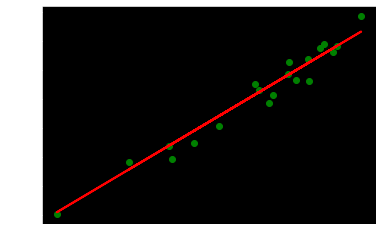

In [30]:
X_test_1=X_test.reshape(20,)
X_train_1=X_train.reshape(80,)
plt.plot(X_test_1, predictions, color='red', linewidth=2, label='Prediction')
plt.scatter(X_test_1, y_test, color='green')
plt.show()